#  Importing Libraries and Data
In this cell, we start by importing the necessary libraries. We use Matplotlib for data visualization, NumPy for numerical operations, Pandas for data handling, and scikit-learn for machine learning tools. We then define our data: **X** represents the independent variable, and **Y** represents the dependent variable.

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


X = np.array([0, 1, 2, -1, -2]).reshape(-1, 1)
Y = np.array([1, 6, 33, 0, 9])

# Polynomial Regression Model Training
In this cell, we calculate the degree of the polynomial regression model, which is one less than the number of data points. We use `PolynomialFeatures` to transform our input data into polynomial features up to the specified degree. Then, we create a linear regression model and train it using the polynomial features.

In [75]:
degree = len(X)-1
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

regressor = LinearRegression()
regressor.fit(X_poly, Y)

LinearRegression()

# Visualization of Polynomial Regression
This cell is responsible for visualizing the polynomial regression results. It generates a range of `x_values` to create a smooth curve and predicts `y_predicted` values. Then, it uses Matplotlib to plot the original data points in red and the predicted curve in blue, providing a visual representation of the model's performance.

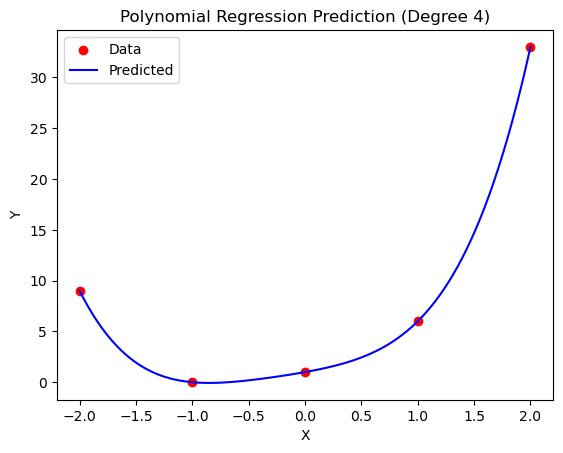

In [76]:
x_values = np.linspace(min(X), max(X), 100).reshape(-1, 1)

x_values_poly = poly.transform(x_values)
y_predicted = regressor.predict(x_values_poly)

plt.scatter(X, Y, color='red', label='Data')

plt.plot(x_values, y_predicted, color='blue', label='Predicted')

plt.title(f'Polynomial Regression Prediction (Degree {degree})')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Data Table
This cell creates a Pandas DataFrame `df` that contains the original data in the 'X' column, actual 'Y' values in the 'Y' column, and the predicted 'Y' values in the 'Y_pred' column.

In [77]:
y_predicted = regressor.predict(X_poly)
data = {'X': X.ravel(), 'Y': Y, 'Y_pred': y_predicted}
df = pd.DataFrame(data)
df

X   Y        Y_pred
0  0   1  1.000000e+00
1  1   6  6.000000e+00
2  2  33  3.300000e+01
3 -1   0 -1.532108e-14
4 -2   9  9.000000e+00

# Polynomial Coefficients
In this cell, we extract the coefficients of the polynomial regression model and create a DataFrame `coeff_df`. The DataFrame presents the coefficients alongside the corresponding features, which are powers of 'X'. This helps in understanding the impact of each term on the model's predictions.

In [84]:
coefficients = regressor.coef_
coeff_data = {'Feature': [f'X^{i}' for i in range(1, degree + 1)], 'Coefficient': coefficients[1:]}
coeff_df = pd.DataFrame(coeff_data)
coeff_df

Feature  Coefficient
0     X^1          2.0
1     X^2          1.0
2     X^3          1.0
3     X^4          1.0

# Generating LaTeX Equation
In this cell, we use the IPython.display library to present the polynomial equation in a LaTeX format. The equation includes the intercept term and non-zero coefficients, effectively excluding terms with coefficients equal to zero. This representation provides a more concise and meaningful equation for your polynomial regression model.

In [88]:
from IPython.display import display, Math


coefficients = [i for i in regressor.coef_]


terms = [f'{coeff:.3f}X^{i}' for i, coeff in enumerate(coefficients) if coeff != 0]
latex_equation = "$Our Equation: {:.3f} + {}$".format(
    regressor.intercept_,
    ' + '.join(terms)
)

display(Math(latex_equation))

<IPython.core.display.Math object>

# Calculating Polynomial Values

In this cell, we define a function, `calculate_polynomial_value`, that calculates the polynomial value with provided coefficients, a value, and an intercept term. The function correctly applies the powers of 'value' to each coefficient, and then adds the intercept term to the result.

The example usage demonstrates how to use the function with the coefficients and intercept from the regressor object. The code calculates and prints the polynomial value with five decimal places for the given value of -2. The result is 9 which is correct according to our initial input output table.

In [90]:
def calculate_polynomial_value(coefficients, X, intercept):
    result = sum(coeff * (X ** i) for i, coeff in enumerate(coefficients))
    return result + intercept

# Example usage:
coefficients = regressor.coef_
intercept = regressor.intercept_
X = 1
result = calculate_polynomial_value(coefficients, X, intercept)
print(f"{result:.5f}")

6.00000
